# Analyzing Benchmark Results for Validation

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
import os

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
pd.options.mode.chained_assignment = None  # default='warn'
sns.set_style("white")

import sys
# This allows us to import the nucml utilities
sys.path.append("..")

import nucml.exfor.data_utilities as exfor_utils
import nucml.evaluation.data_utilities as endf_utils
import nucml.plot.plotting_utilities as plot_utils
import nucml.datasets as nuc_data
import nucml.ace.data_utilities as ace_utils
import nucml.model.model_building as model_building
import nucml.model.model_utilities as model_utils
import nucml.general_utilities as gen_utils
import nucml.ace.plotting_utilities as ace_plots

In [28]:
importlib.reload(exfor_utils)
importlib.reload(gen_utils)
importlib.reload(endf_utils)
importlib.reload(plot_utils)
importlib.reload(nuc_data)
importlib.reload(ace_utils)
importlib.reload(model_building)
importlib.reload(model_utils)
importlib.reload(ace_plots)
print("Finish re-loading scripts.")

Finish re-loading scripts.


In [9]:
figure_dir = "figures/B0/"

In [10]:
sns.set(font_scale=2.5)
sns.set_style('white')

## Gathering Results from Benchmark Calculations

In [29]:
dt_results = ace_utils.gather_benchmark_results("ml/DT_B0/")

In [30]:
dt_results

,Model,Benchmark,K_eff_ana,Unc_ana,K_eff_imp,Unc_imp,Deviation_Ana,Deviation_Imp
0,DT400_MSS2_MSL1_robust_one_hot_B0_v1,U233-MET-FAST-001,1.004320,0.00140,1.003470,0.00100,0.004320,0.003470
1,DT90_MSS10_MSL7_minmax_one_hot_B0_v1,U233-MET-FAST-001,0.928458,0.00122,0.929726,0.00091,0.071542,0.070274
2,DT90_MSS10_MSL7_minmax_one_hot_B0_v1,U233-MET-FAST-002,0.930687,0.00152,0.929404,0.00097,0.069313,0.070596
3,DT90_MSS10_MSL7_minmax_one_hot_B0_v1,U233-MET-FAST-003,0.928207,0.00130,0.928817,0.00083,0.071793,0.071183
4,DT99_MSS10_MSL7_robust_one_hot_B0_v1,U233-MET-FAST-001,1.000320,0.00123,0.999088,0.00096,0.000320,0.000912


In [33]:
dt_results.groupby("Model").mean()

,K_eff_ana,Unc_ana,K_eff_imp,Unc_imp,Deviation_Ana,Deviation_Imp
Model,,,,,,
DT400_MSS2_MSL1_robust_one_hot_B0_v1,1.004320,0.001400,1.003470,0.001000,0.004320,0.003470
DT90_MSS10_MSL7_minmax_one_hot_B0_v1,0.929117,0.001347,0.929316,0.000903,0.070883,0.070684
DT99_MSS10_MSL7_robust_one_hot_B0_v1,1.000320,0.001230,0.999088,0.000960,0.000320,0.000912


In [173]:
knn_results = ace_utils.gather_benchmark_results("acedata_ml/U233/KNN_B0/")

## Analyzing Decision Tree Results

In [174]:
to_append_dt = pd.read_csv("../ML_EXFOR_neutrons/2_DT/DT_B0/dt_results.csv")
to_append_dt["Model"] = to_append_dt.model_path.apply(lambda x: os.path.basename(os.path.dirname(x)))
to_append_dt = to_append_dt[["Model", "train_mae", "val_mae", "test_mae", "normalizer", "max_depth", "mss", "msl"]]

In [175]:
dt_final = dt_results.merge(to_append_dt, on="Model")

In [183]:
dt_final.sort_values(by="Deviation_Ana").head()

,Model,K_eff_ana,Unc_ana,K_eff_imp,Unc_imp,Deviation_Ana,Deviation_Imp,train_mae,val_mae,test_mae,normalizer,max_depth,mss,msl
13,DT100_MSS15_MSL7_standard_one_hot_B0_v5,0.999986,0.00134,0.999747,0.00094,0.000014,0.000253,0.094735,0.119564,0.119406,standard,100,15,7.0
215,DT310_MSS15_MSL1_standard_one_hot_B0_v5,1.000020,0.00128,0.999413,0.00094,0.000020,0.000587,0.079405,0.123328,0.122877,standard,310,15,1.0
63,DT130_MSS15_MSL1_standard_one_hot_B0_v5,1.000020,0.00147,0.999214,0.00103,0.000020,0.000786,0.079611,0.123247,0.122789,standard,130,15,1.0
26,DT110_MSS10_MSL5_standard_one_hot_B0_v5,0.999973,0.00139,0.998799,0.00090,0.000027,0.001201,0.088348,0.119878,0.119798,standard,110,10,5.0
4,DT100_MSS10_MSL5_standard_one_hot_B0_v5,1.000040,0.00138,0.999120,0.00099,0.000040,0.000880,0.088350,0.119874,0.119792,standard,100,10,5.0


In [211]:
dt_standard = dt_final[dt_final.normalizer == "standard"]

In [212]:
model_utils.get_best_models_df(dt_standard)

,Model,K_eff_ana,Unc_ana,K_eff_imp,Unc_imp,Deviation_Ana,Deviation_Imp,train_mae,val_mae,test_mae,normalizer,max_depth,mss,msl,tag
237,DT335_MSS2_MSL1_standard_one_hot_B0_v5,1.00396,0.00139,1.00331,0.00101,0.00396,0.00331,0.025784,0.135760,0.135082,standard,335,2,1.0,Train
20,DT106_MSS10_MSL7_standard_one_hot_B0_v5,1.00011,0.00137,0.99954,0.00090,0.00011,0.00046,0.094400,0.119509,0.119396,standard,106,10,7.0,Val
353,DT90_MSS15_MSL7_standard_one_hot_B0_v5,1.00116,0.00127,1.00023,0.00087,0.00116,0.00023,0.094737,0.119555,0.119394,standard,90,15,7.0,Test


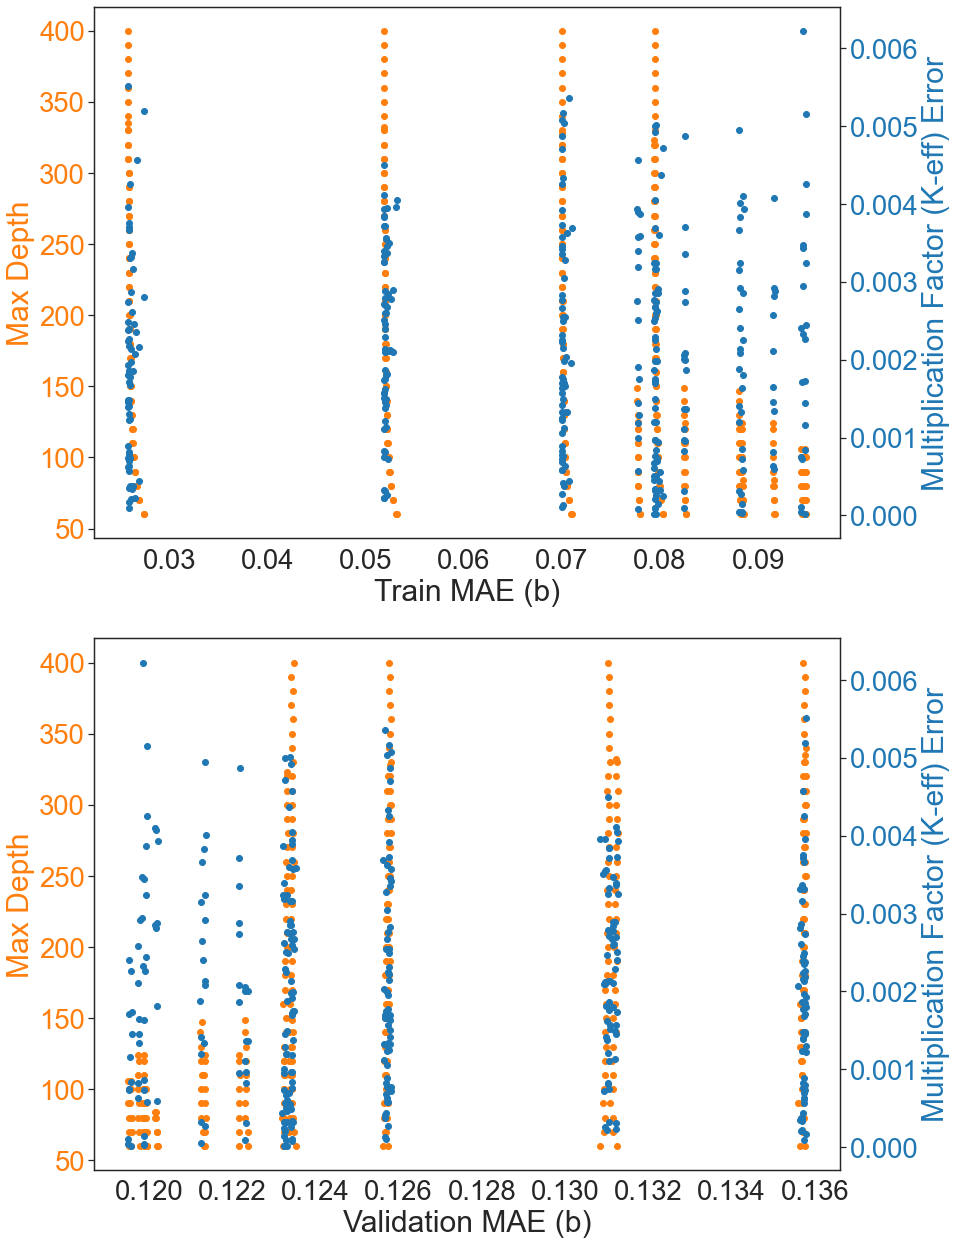

In [189]:
ace_plots.dt_dual_keff_plot(
    dt_final[dt_final.Deviation_Ana < 0.03], 
    "train_mae", "val_mae", "max_depth", "Deviation_Ana", save=True, saving_dir=figure_dir)

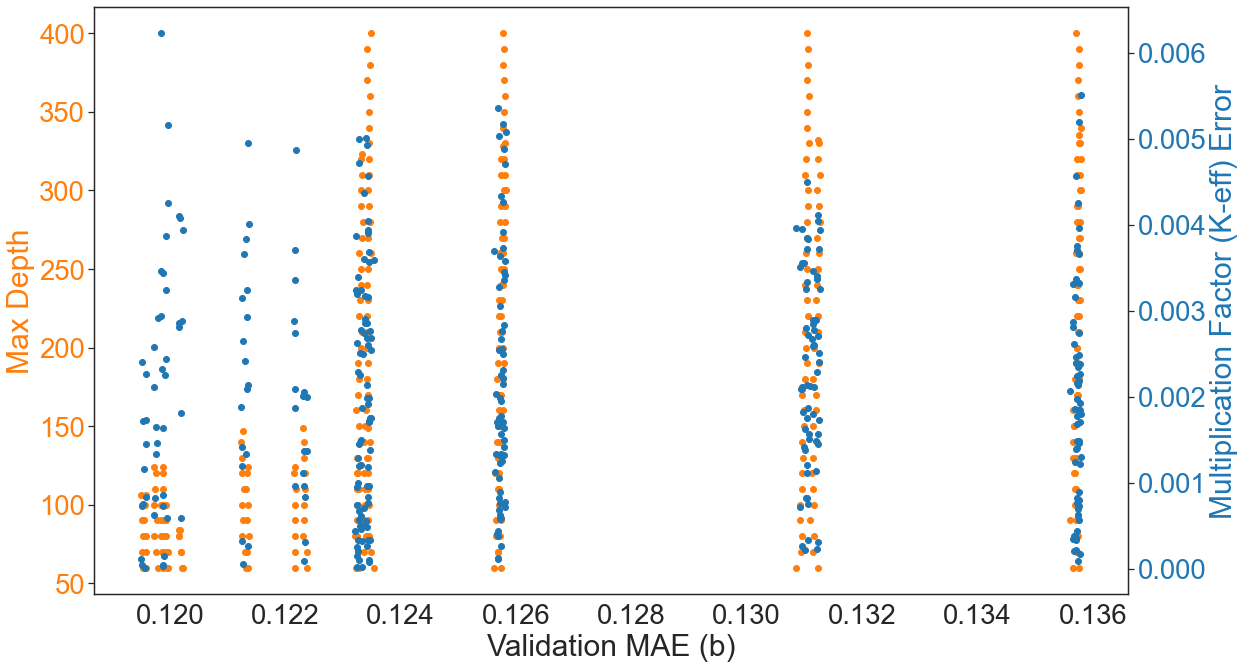

In [192]:
ace_plots.dt_keff_plot(dt_final[dt_final.Deviation_Ana < 0.03], "val_mae", "max_depth", "Deviation_Ana", save=True, saving_dir=figure_dir)

## Analyzing KNN Results

In [193]:
to_append_knn = pd.read_csv("../ML_EXFOR_neutrons/1_KNN/KNN_B0/knn_results.csv")
to_append_knn["Model"] = to_append_knn.model_path.apply(lambda x: os.path.basename(os.path.dirname(x)))
to_append_knn = to_append_knn[["Model", "id", "train_mae", "val_mae", "test_mae", "normalizer", "distance_metric"]]

In [194]:
knn_final = knn_results.merge(to_append_knn, on="Model")

In [195]:
knn_final["k"] = knn_final.Model.apply(lambda x: x.split("_")[0][1:]).astype(int)

In [197]:
knn_final.sort_values(by="Deviation_Ana").head()

,Model,K_eff_ana,Unc_ana,K_eff_imp,Unc_imp,Deviation_Ana,Deviation_Imp,id,train_mae,val_mae,test_mae,normalizer,distance_metric,k
1,k10_distance_euclidean_robust_one_hot_B0_v4,1.000040,0.00133,1.000170,0.00091,0.000040,0.000170,10,0.025909,0.119757,0.121358,robust,euclidean,10
7,k11_distance_euclidean_robust_one_hot_B0_v4,0.999425,0.00127,0.998958,0.00090,0.000575,0.001042,11,0.025880,0.120686,0.121574,robust,euclidean,11
36,k16_distance_euclidean_power_yeo_one_hot_B0_v4,1.000660,0.00135,1.001130,0.00083,0.000660,0.001130,16,0.025831,0.119399,0.119854,power_yeo,euclidean,16
65,k1_distance_manhattan_standard_one_hot_B0_v4,1.000710,0.00129,1.000770,0.00092,0.000710,0.000770,1,0.029088,0.140556,0.139902,standard,manhattan,1
90,k5_distance_euclidean_power_yeo_one_hot_B0_v4,1.000770,0.00149,1.002300,0.00097,0.000770,0.002300,5,0.026049,0.120277,0.120255,power_yeo,euclidean,5


In [198]:
knn_robust_euclidean = knn_final[(knn_final.distance_metric == "euclidean") & (knn_final.normalizer == "robust")].sort_values(by="k")

In [199]:
model_utils.get_best_models_df(knn_robust_euclidean)

,Model,K_eff_ana,Unc_ana,K_eff_imp,Unc_imp,Deviation_Ana,Deviation_Imp,id,train_mae,val_mae,test_mae,normalizer,distance_metric,k,tag
67,k20_distance_euclidean_robust_one_hot_B0_v4,0.993452,0.00158,0.994585,0.00098,0.006548,0.005415,20,0.025793,0.123483,0.123792,robust,euclidean,20,Train
108,k8_distance_euclidean_robust_one_hot_B0_v4,1.003870,0.00140,1.004010,0.00089,0.003870,0.004010,8,0.025949,0.119539,0.121166,robust,euclidean,8,Val
108,k8_distance_euclidean_robust_one_hot_B0_v4,1.003870,0.00140,1.004010,0.00089,0.003870,0.004010,8,0.025949,0.119539,0.121166,robust,euclidean,8,Test


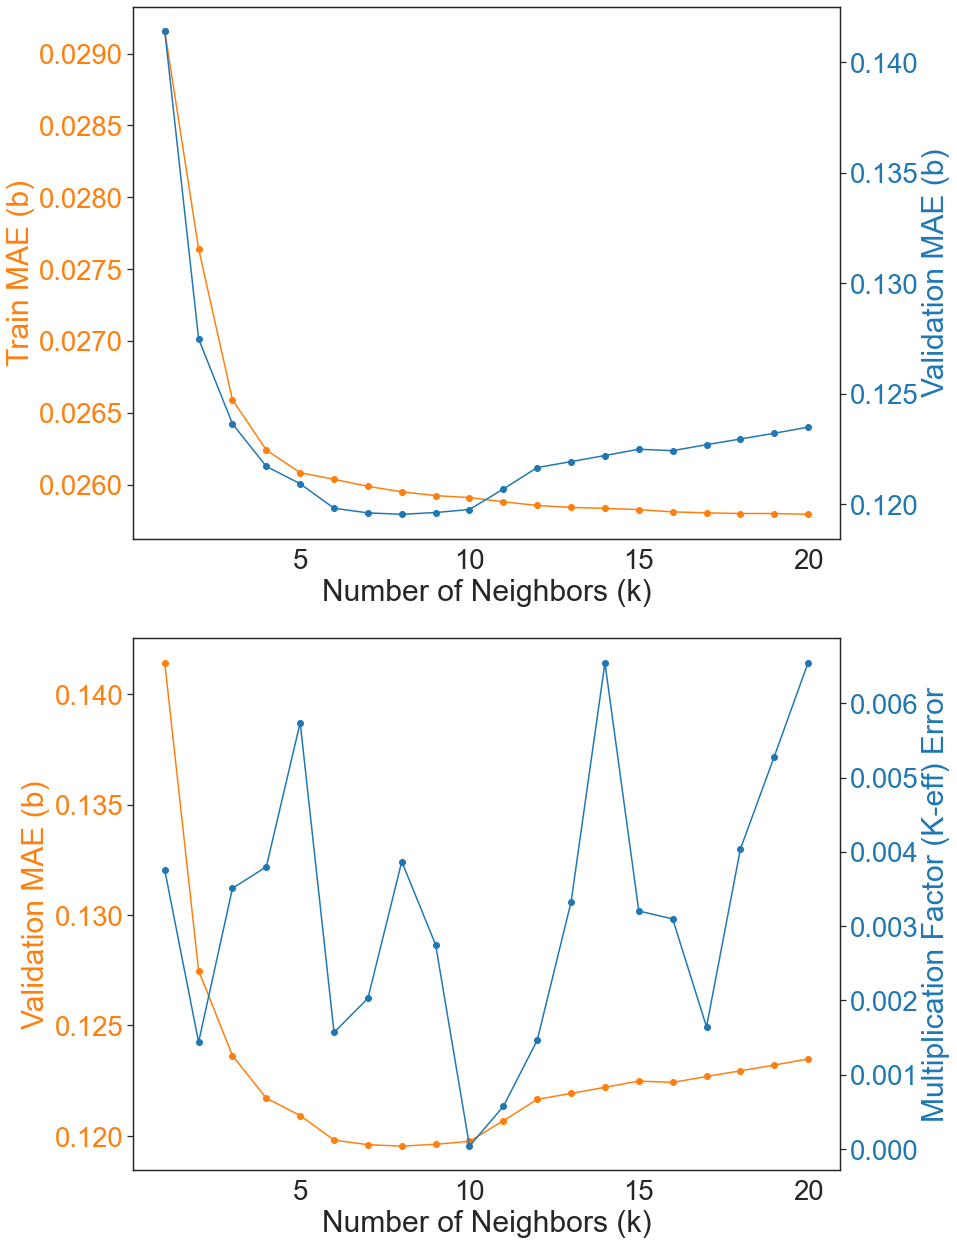

In [206]:
ace_plots.knn_dual_plot(
    knn_robust_euclidean, "k", "train_mae", "val_mae", "Deviation_Ana", save=True, saving_dir=figure_dir)

In [208]:
# ace_plot_utils.knn_dual_plot(
#     knn_robust_euclidean, "k", "train_mae", "val_mae", "K_eff_ana", save=False, saving_dir=figure_dir)

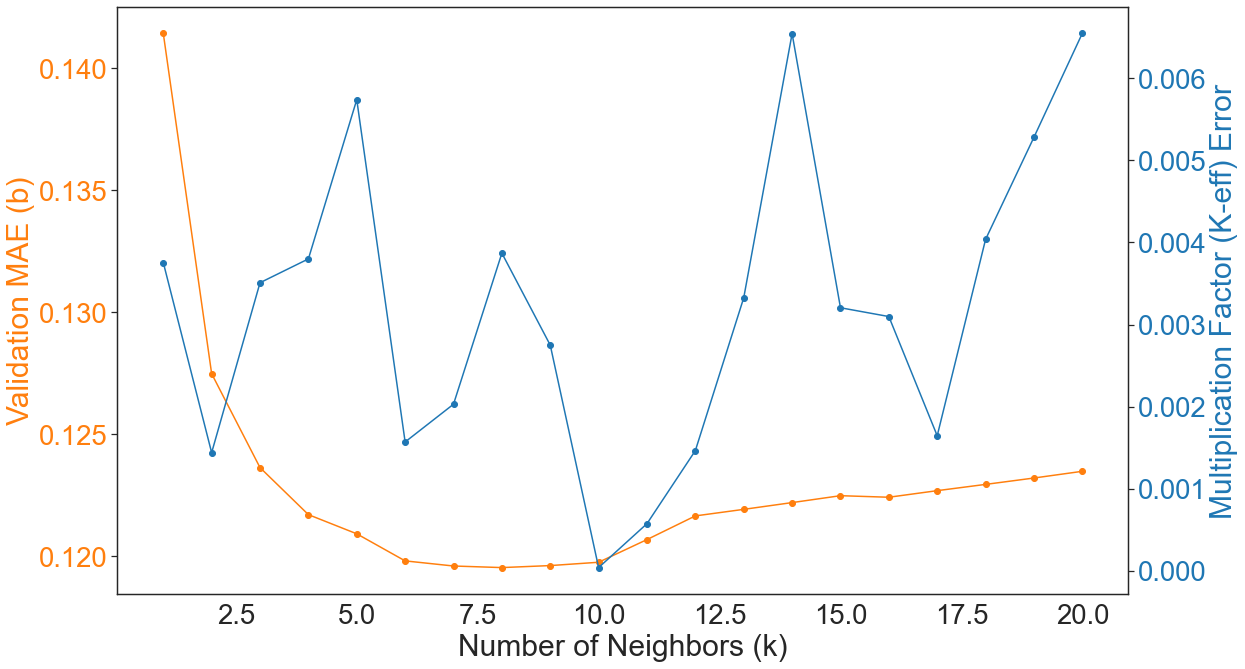

In [210]:
ace_plots.knn_keff_plot(
    knn_robust_euclidean, "k", "val_mae", "Deviation_Ana", save=True, saving_dir=figure_dir)